In [323]:
class Flow:

    def __init__(self):
        self.vertices = []
        self.arrows = []
        self.decode_vertices = []
        self.decode_arrows = []


    def constructor(self, vertices, arrows):
        self.decode_vertices = vertices
        self.decode_arrows = arrows

        self.vertices = [_ for _ in range(len(vertices))]
        self.arrows = []
        for arrow in arrows:
            u = vertices.index(arrow[0])
            v = vertices.index(arrow[1])
            self.arrows.append([u, v])
        self.m = len(self.arrows)
    

    def build_graph(self):
        self.num_prev = [0] * len(self.vertices)
        self.num_next = [0] * len(self.vertices)

        self.head = [-1] * len(self.vertices)
        self.before = [None] * self.m
        self.adj = [None] * self.m

        for i, ar in enumerate(self.arrows):
            u, v = ar[0], ar[1]
            self.num_next[u] += 1
            self.num_prev[v] += 1
            self.adj[i] = v
            self.before[i] = self.head[u]
            self.head[u] = i
    

    def toposort(self):
        
        print("????")

        if not self.vertices:
            return []

        self.build_graph()

        self.end_vertices = [u for u in self.vertices if self.num_next[u] == 0]
        
        topo_queue = []
        for ver in self.vertices:
            if self.num_prev[ver] == 0:
                topo_queue.append(ver)
        
        self.order = []
        b_ind, e_ind = 0, 0
        while b_ind <= e_ind:
            if len(topo_queue) > 0:
                u = topo_queue[0]
                topo_queue = topo_queue[1:]
                e_ind += 1
                self.order.append(u)
                pos = self.head[u]
                while pos != -1:
                    v = self.adj[pos]
                    self.num_prev[v] -= 1
                    if self.num_prev[v] == 0:
                        topo_queue.append(v)
                    pos = self.before[pos]
                b_ind += 1
            else:
                break
        
        if e_ind < len(self.vertices):
            self.order = []
            self.end_vertices = []

        # decode
        decode_toposort = [self.decode_vertices[_] for _ in self.order]
        decode_end_vertices = [self.decode_vertices[_] for _ in self.end_vertices]
        
        return decode_toposort

    
    def sub_toposort_from(self, vertex):     
        if vertex not in self.decode_vertices:
            return []
        
        encode_vertext = self.decode_vertices.index(vertex)
        
        self.build_graph()

        # bfs from vertex
        bfs_queue = [encode_vertext]
        b_ind, e_ind = 0, 0
        while b_ind <= e_ind:
            u = bfs_queue[b_ind]
            b_ind += 1
            pos = self.head[u]
            while pos != -1:
                v = self.adj[pos]
                if v not in bfs_queue:
                    bfs_queue.append(v)
                    e_ind += 1
                pos = self.before[pos]

        genealogy_of_vertex = [self.decode_vertices[_] for _ in self.order if _ in bfs_queue]
        
        return genealogy_of_vertex

In [324]:
flow = Flow()

In [325]:
vertices = [0, 1]
arrows = []
flow.constructor(vertices, arrows)

In [326]:
flow.decode_arrows

[]

In [327]:
flow.decode_vertices

[0, 1]

In [328]:
x1 = flow.toposort()

????


In [330]:
x2 = flow.sub_toposort_from(0)

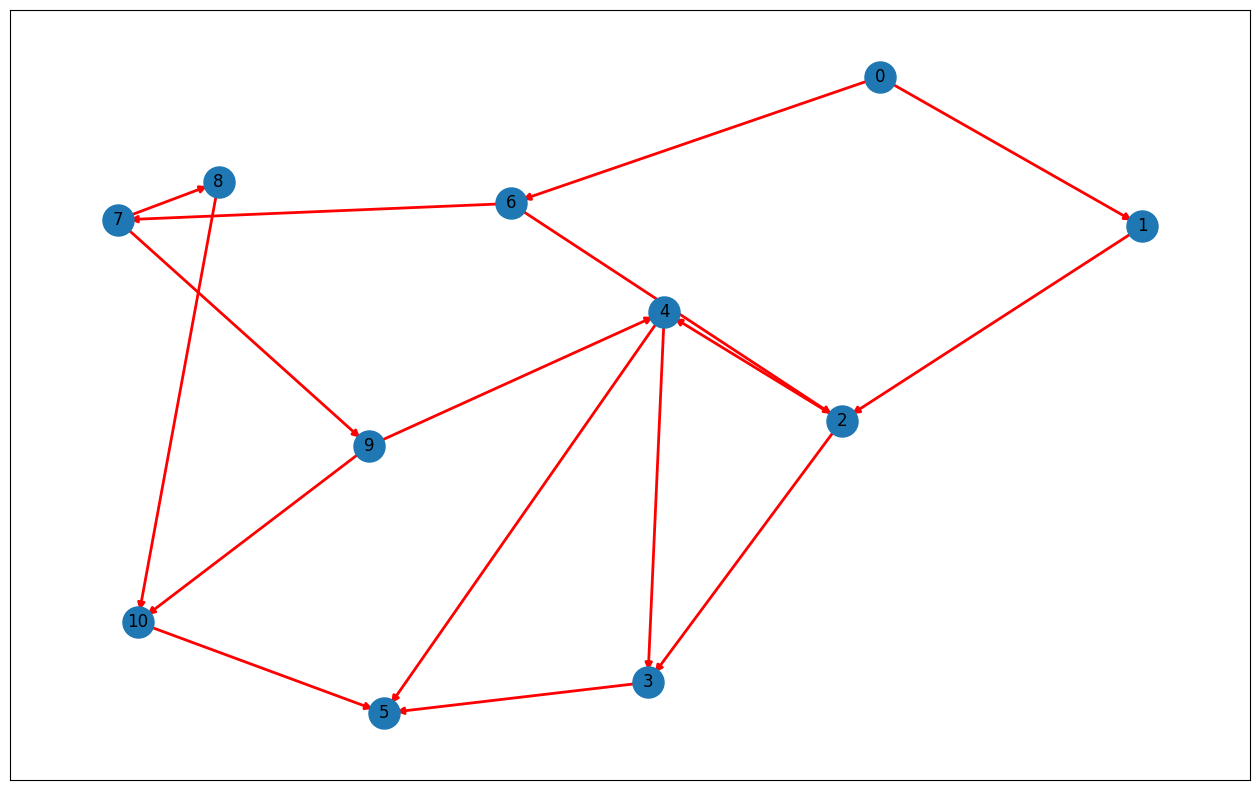

In [126]:
vertices = [10, 0, 2, 4, 6, 8, 1, 3, 5, 7, 9]
arrows = [[0, 1],
          [0, 6],
          [1, 2],
          [6, 2],
          [6, 7],
          [7, 9],
          [7, 8],
          [9, 10],
          [8, 10],
          [9, 4],
          [2, 3],
          [2, 4],
          [4, 3],
          [3, 5],
          [4, 5],
          [10, 5],
         ]

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for u in vertices:
    G.add_node(u)
for u, v in arrows:
    G.add_edge(u, v)
    
pos = nx.spring_layout(G)

plt.figure(figsize=(16, 10))
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', width=2.0, arrows = True)

plt.show()

In [127]:
flow = Flow()

In [128]:
flow.constructor(vertices, arrows)

In [129]:
order, endv = flow.toposort()

In [130]:
order

[0, 6, 1, 7, 2, 8, 9, 4, 10, 3, 5]

In [90]:
endv

[5]

In [96]:
flow.sub_toposort_from(7)

([7, 8, 9, 4, 10, 3, 5], [])